# Stock Market Prediction using Time-series and Daily News Analysis

## Preprocessing and Modeling

In [5]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

pd.set_option('mode.chained_assignment', 'raise') # Raise an exception, warn, or no action if trying to use chained assignment

In [9]:
# Read the combines stock index CSV data file from the data directory
dataset = pd.read_csv('data/comb_data_final.csv',index_col='Date',parse_dates=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2008-08-08 to 2016-07-01
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1989 non-null   float64
 1   High       1989 non-null   float64
 2   Low        1989 non-null   float64
 3   Close      1989 non-null   float64
 4   Volume     1989 non-null   int64  
 5   Adj Close  1989 non-null   float64
 6   Label      1989 non-null   int64  
 7   Top1       1989 non-null   object 
 8   Top2       1989 non-null   object 
 9   Top3       1989 non-null   object 
 10  Top4       1989 non-null   object 
 11  Top5       1989 non-null   object 
 12  Top6       1989 non-null   object 
 13  Top7       1989 non-null   object 
 14  Top8       1989 non-null   object 
 15  Top9       1989 non-null   object 
 16  Top10      1989 non-null   object 
 17  Top11      1989 non-null   object 
 18  Top12      1989 non-null   object 
 19  Top13      1989 non-null   obj

In [10]:
dataset.index

DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

In [11]:
dataset.head(3)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


## Train/Test split for Time Series data

With train/test split of our stock index data, we cannot use traditional random splitting like we normally do because we would lost the time component nature of our data.

So, since we have 8 years worth of stock index data, I have decided to do a six year - two year split (75%-25%) of our data into train and test dataset .

In [12]:
# Our data is ends at '2016-07-01', so years are not from jan to dec.
# Unique years
dataset.index.year.unique()

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Date')

In [13]:
# Set the threshold two years before the last date (at the beginning of 7th year)
threshold = dataset.index.max() - pd.DateOffset(years=2) 
threshold

Timestamp('2014-07-01 00:00:00')

In [146]:
# Create Train and Test datasets
X_train = dataset[dataset.index <= threshold]
X_test = dataset[dataset.index > threshold]

In [147]:
# Shape of training set
print('\n Shape of training set:')
print(X_train.shape)

# Shapes of test set
print('\n Shape of test set:')
print(X_test.shape)


 Shape of training set:
(1484, 32)

 Shape of test set:
(505, 32)


In [16]:
# Let's see the status of our split
# We have achieved 75%-25% split of the data
X_train.shape[0] / dataset.shape[0], X_test.shape[0] / dataset.shape[0]

(0.7461035696329814, 0.2538964303670186)

In [17]:
X_train.head(2)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [18]:
X_test.head(2)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-02,16949.710938,16986.630859,16949.710938,16976.240234,57840000,16976.240234,1,Facebook Is Under Investigation For Mood Manip...,African leaders vote to give themselves immuni...,British PM David Cameron calls for global resp...,...,Metropolitan Police 'deleted evidence of sex a...,French ex-leader Nicolas Sarkozy charged with ...,ISPs take GCHQ to court in UK over mass survei...,Ebola death toll rises to 467 out of 759 cases...,Police in Hong Kong have arrested 196 proteste...,Egypt's richest man sentenced to 3 years in ja...,All Iranian Su-25 Frogfoot attack planes have ...,French Ban on Face Veils Upheld by European Ri...,"""I am convinced that we should develop a Europ...",Over Half a Million Rally in Hong Kong Against...
2014-07-03,16979.000000,17074.650391,16979.000000,17068.259766,66800000,17068.259766,1,"In 2012, New Zealand police seized computer dr...",Anyone who is determined to be using Tor is ta...,Pope Francis approves the revival of exorcism ...,...,The Home Office is facing calls to explain why...,"Saudi Arabia deploys 30,000 soldiers to border...",Russian social media users are campaigning aga...,"In a rare scene of disorder, Hong Kong police ...","EU Court of Justice ""save the internet"" by hol...",Ukraine conflict: At Least Nine Civilians kill...,"Rampant torture, arbitrary arrests and detenti...",At least 17 rockets hit Israel on Wednesday. -...,A scientist who carried out research on making...,Chapel dedicated to pharaoh Mentuhotep II foun...


## Models
### Moving Average Model 1

In [168]:
# In this first version, we are using the actual test values in our predictions as part of the moving average calculation. We append the test values one by one to the train set at each iteration and calculate the moving average using a window of test-size data points, which is 505 in this case.

# Create a list from X_train['Adj Close'] to append
past=[x for x in X_train['Adj Close']]

# Create empty prediction list
preds1 = []
# Iterate through the data points to calculate moving average
for i in range(0,X_test.shape[0]):
    a = sum(past[len(past)-X_test.shape[0]:])
    b = a/X_test.shape[0]
    preds1.append(b)
    past.append(X_test['Adj Close'][i])

# Evaluate error (RMSE value)
rmse = np.sqrt(np.mean(np.power((np.array(X_test['Adj Close'])-preds1),2)))
print('RMSE on train set:', rmse)

RMSE on train set: 1294.1254041701773


In [169]:
# Add the prediction column to the test set
X_test_copy = X_test.copy()
X_test_copy.loc[:, 'preds1'] = preds1

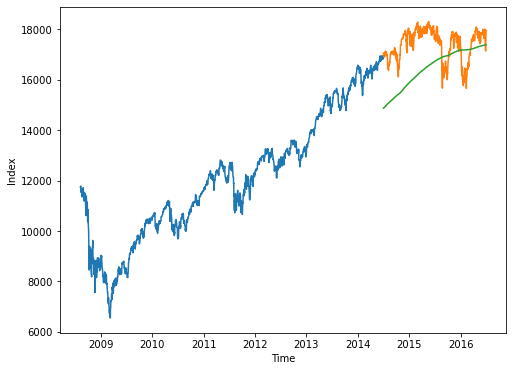

In [170]:
# Plot the forecast
plt.figure(figsize=(8, 6))
plt.plot(X_train['Adj Close'])
plt.plot(X_test_copy[['Adj Close', 'preds1']])
plt.xlabel('Time')
plt.ylabel('Index');

### Conclusion
This model and the last are very close and they are both better than the second model.

### Moving Average Model 2 (optional)

In [171]:
# In this version, we are using our predictions as part of the moving average calculation
# We make predictions by doing a rolling sum of past data points and the predictions at each iteration, Total data points averaged is always the size of the test dataset.

# Create a list from X_train['Adj Close'] to append
past=[x for x in X_train['Adj Close']]

# Create empty prediction list
preds2 = []
# Iterate through the data points to calculate moving average
for i in range(0, X_test.shape[0]):
    a = X_train['Adj Close'][len(X_train)-505+i:].sum() + sum(preds2)
    b = a/505
    preds2.append(b)

# Evaluate error (RMSE value)
rmse = np.sqrt(np.mean(np.power((np.array(X_test['Adj Close'])-preds2),2)))
print('RMSE on train set:', rmse)

RMSE on train set: 1998.9632028455158


In [172]:
# Add the prediction column to the test set
#X_test2 = X_test.copy()
X_test_copy.loc[:, 'preds2'] = preds2

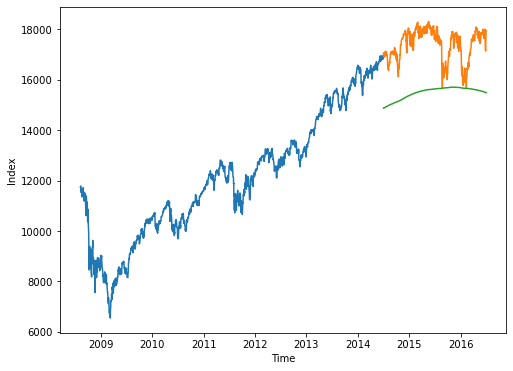

In [173]:
# Plot the forecast
plt.figure(figsize=(8, 6))
plt.plot(X_train['Adj Close'])
plt.plot(X_test_copy[['Adj Close', 'preds2']])
plt.xlabel('Time')
plt.ylabel('Index');

### Conclusion
We expected that this would be a slightly worse model than the first moving average model. We are using our predicted values as part of the moving average calculation in this model.

### Moving Average Model 3 (optional)

In [177]:
# In this version, we are using rolling function of pandas with a window size of test size(505) to calculate the moving average. We are using the entire dataset to calculate the last 505 data points which corresponds to the test dataset predictions.
preds3 = dataset['Adj Close'].rolling(window=505).mean()[len(dataset)-505:]

# Evaluate error (RMSE value)
rmse = np.sqrt(np.mean(np.power((np.array(X_test['Adj Close'])-preds3),2)))
print('RMSE on train set:', rmse)

RMSE on train set: 1288.795051639972


In [178]:
# Add the prediction column to the test set
#X_test2 = X_test.copy()
X_test_copy.loc[:, 'preds3'] = preds3

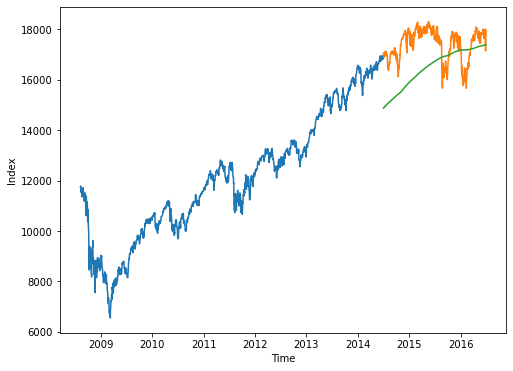

In [179]:
# Plot the forecast
plt.figure(figsize=(8, 6))
plt.plot(X_train['Adj Close'])
plt.plot(X_test_copy[['Adj Close', 'preds3']])
plt.xlabel('Time')
plt.ylabel('Index');